In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st 
import os
os.chdir('D:\Shashi Katteri\Desktop\data sets to work on\default-of-credit-card-clients-dataset')

In [2]:
df=pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

#### Content

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [4]:
pd.set_option('display.max_columns',30)
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df1=df.drop('ID',axis=1)

In [6]:
#sns.pairplot(df[['LIMIT_BAL','AGE','PAY_0',
'PAY_2',
'PAY_3',
'PAY_4',
'PAY_5',
'PAY_6',
'BILL_AMT1',
'BILL_AMT2',
'BILL_AMT3',
'BILL_AMT4',
'BILL_AMT5',
'BILL_AMT6',
'PAY_AMT1',
'PAY_AMT2',
'PAY_AMT3',
'PAY_AMT4',
'PAY_AMT5',
'PAY_AMT6',
'default.payment.next.month']],diag_kind='kde')

SyntaxError: invalid syntax (<ipython-input-6-dd1ecbab6e32>, line 19)

In [7]:
df1['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [8]:
df1.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


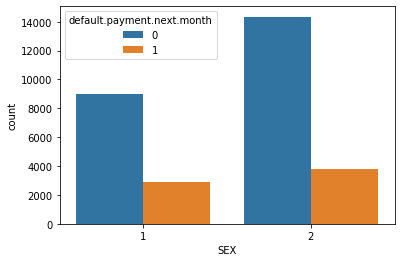

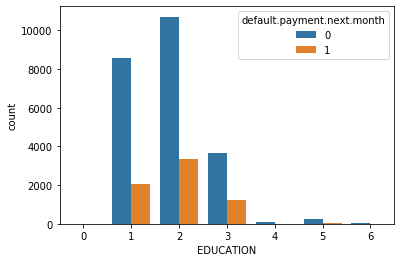

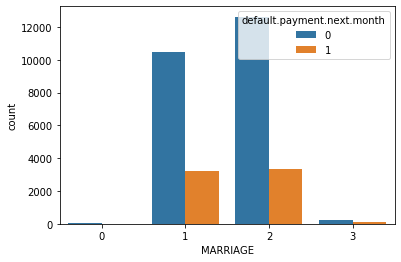

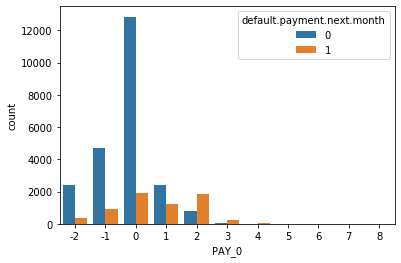

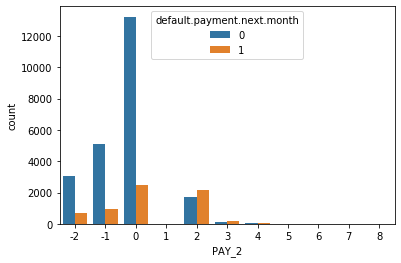

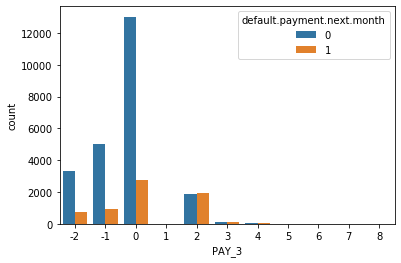

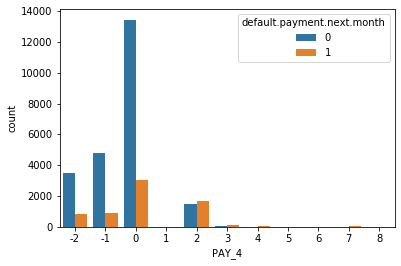

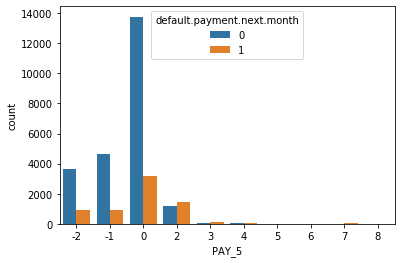

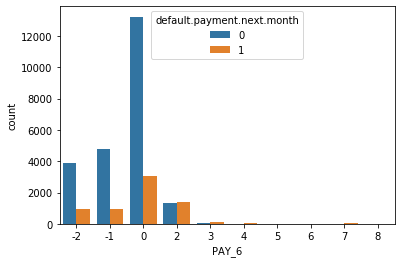

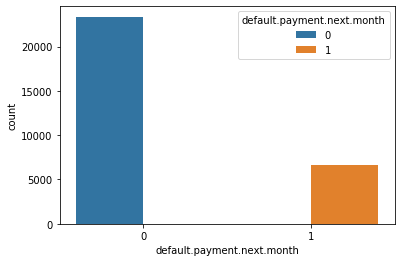

In [10]:
cat=['SEX','EDUCATION','MARRIAGE','PAY_0',
'PAY_2',
'PAY_3',
'PAY_4',
'PAY_5',
'PAY_6',
'default.payment.next.month']
for i in cat:
    sns.countplot(df1[i],hue=df1['default.payment.next.month'])
    plt.show()

In [14]:
df1['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

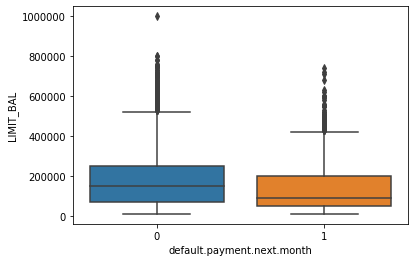

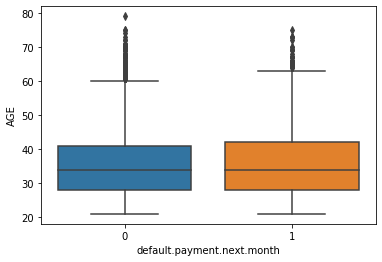

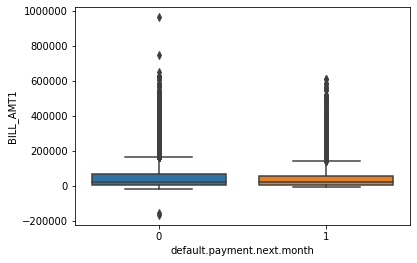

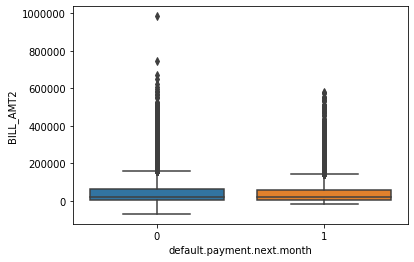

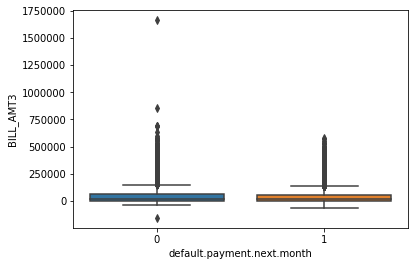

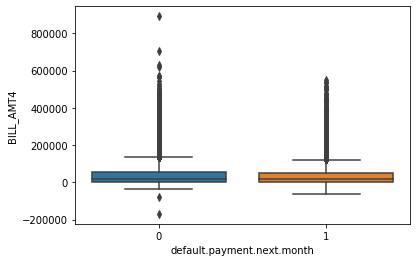

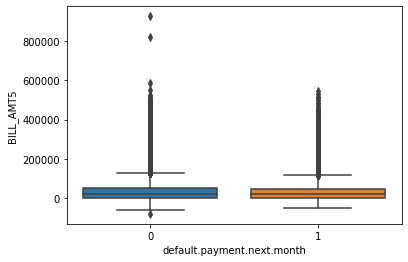

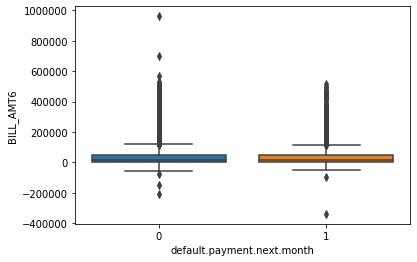

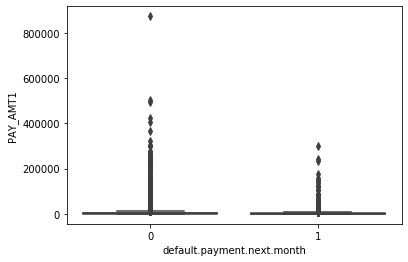

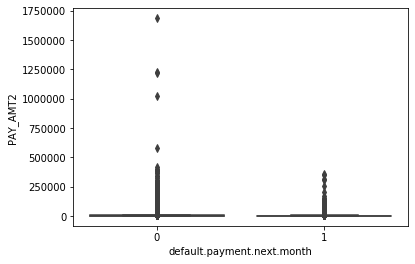

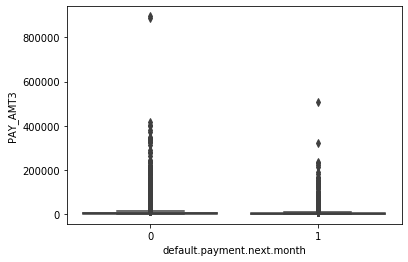

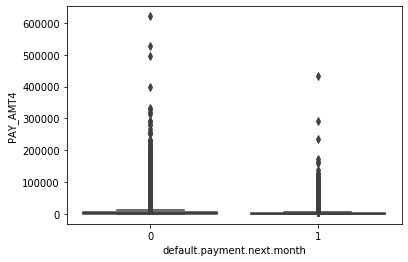

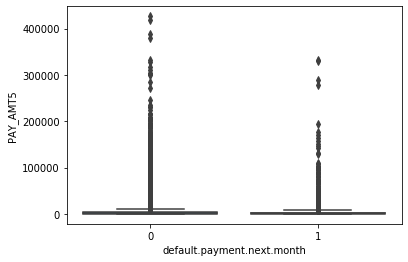

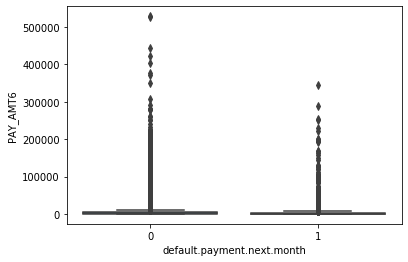

In [16]:
num=['LIMIT_BAL','AGE',
'BILL_AMT1',
'BILL_AMT2',
'BILL_AMT3',
'BILL_AMT4',
'BILL_AMT5',
'BILL_AMT6',
'PAY_AMT1',
'PAY_AMT2',
'PAY_AMT3',
'PAY_AMT4',
'PAY_AMT5',
'PAY_AMT6']
for i in num:
    sns.boxplot(y=df[i],x=df['default.payment.next.month'])
    plt.show()

In [17]:
x=df1.drop('default.payment.next.month',axis=1)
y=df1['default.payment.next.month']

In [18]:


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

pd.DataFrame(vif,index=x.columns)

,0
LIMIT_BAL,4.037479
SEX,9.092210
EDUCATION,6.731119
MARRIAGE,6.265388
AGE,10.857679
PAY_0,1.918276
PAY_2,3.211217
PAY_3,3.727427
PAY_4,4.440120
PAY_5,4.985856


# Classification Models

## No Changes 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,classification_report,confusion_matrix

In [63]:
def mod_eval(algo,x,y):
    cv1= cross_val_score(algo,x,y,scoring='roc_auc',cv=10)
    cv2=cross_val_score(algo,x,y,scoring='accuracy',cv=10)
    
    print('10-fold auc_score',np.mean(cv1))
    print('10-fold accuracy',np.mean(cv2))
    
    

In [77]:
models={'Logistic Regression':LogisticRegression(solver='liblinear'),'Random Forest':RandomForestClassifier(**rbp),
       'Light GBM(Boosting)':LGBMClassifier(**lbp),'Gausian Naive Bayes':GaussianNB()
       }

In [60]:
def rand_search(algo,params):
    rs=RandomizedSearchCV(algo,param_distributions=params,random_state=0,n_jobs=-1,n_iter=100,scoring='roc_auc',cv=5)
    mod=rs.fit(x,y)
    print(mod.best_score_)
    return mod.best_params_

In [27]:
rfc_params={'n_estimators':st.randint(50,300),
    'criterion':['gini','entropy'],
    'max_depth':st.randint(2,20),
    'min_samples_split':st.randint(2,100),
    'min_samples_leaf':st.randint(2,100)}
lgb_params={ 'num_leaves':st.randint(31,60),
   'max_depth':st.randint(2,20),
    'learning_rate':st.uniform(0,1),
    'n_estimators':st.randint(50,300),
    'min_split_gain':st.uniform(0,0.3)}

In [74]:
rbp=rand_search(RandomForestClassifier(),rfc_params)

0.7837700232914593


In [75]:
lbp=rand_search(LGBMClassifier(),lgb_params)

0.7828780323897706


In [78]:
for i in models.keys():
    print(i,'\n')
    mod_eval(models[i],x,y)

Logistic Regression 

10-fold auc_score 0.6492364051565253
10-fold accuracy 0.7787999999999999
Random Forest 

10-fold auc_score 0.7843459163593505
10-fold accuracy 0.8202999999999999
Light GBM(Boosting) 

10-fold auc_score 0.7827961507779488
10-fold accuracy 0.8214666666666666
Gausian Naive Bayes 

10-fold auc_score 0.6716898571761225
10-fold accuracy 0.3779666666666667


## Let us try SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [45]:
sm=SMOTE(sampling_strategy=0.5,random_state=7)
x_sm,y_sm=sm.fit_resample(x,y)
print(x_sm.shape,y_sm.shape)

(35046, 23) (35046,)


In [46]:
y_sm.value_counts()

0    23364
1    11682
Name: default.payment.next.month, dtype: int64

In [56]:
def rand_search_sm(algo,params):
    rs=RandomizedSearchCV(algo,param_distributions=params,random_state=0,n_jobs=-1,n_iter=100,scoring='roc_auc',cv=10)
    mod=rs.fit(x_sm,y_sm)
    print(mod.best_score_)
    return mod.best_params_

In [69]:
rbp_sm=rand_search_sm(RandomForestClassifier(),rfc_params)

0.8334956225636085


In [70]:
lbp_sm=rand_search_sm(LGBMClassifier(),lgb_params)

0.8434539856494592


In [71]:
models_sm={'Logistic Regression':LogisticRegression(solver='liblinear'),'Random Forest':RandomForestClassifier(**rbp_sm),
       'Light GBM(Boosting)':LGBMClassifier(**lbp_sm),'Gausian Naive Bayes':GaussianNB()
       }

In [72]:
for i in models_sm.keys():
    print(i,'\n')
    mod_eval(models_sm[i],x_sm,y_sm)

Logistic Regression 

10-fold auc_score 0.6645785612076407
10-fold accuracy 0.6671516962069842
Random Forest 

10-fold auc_score 0.8335970023892673
10-fold accuracy 0.7886826630579928
Light GBM(Boosting) 

10-fold auc_score 0.8434539856494592
10-fold accuracy 0.7993862811769228
Gausian Naive Bayes 

10-fold auc_score 0.6737459506222787
10-fold accuracy 0.42412939929259574


It is clear that Random Forest and Light GBM are giving the best results. Hence we can pick these Continue with these algorithms.

By using SMOTE we have seen sigificant improvement in auc but the accuracy is lower

In [81]:
def model_eval(algo,x,y):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=3)

    mod=algo.fit(x_train,y_train)

    train_pred=mod.predict(x_train)
    train_prob=mod.predict_proba(x_train)[:,1]

    print('overall accuracy -Train: ',accuracy_score(y_train,train_pred))
    print('confusion matrix:\n',confusion_matrix (y_train,train_pred))
    print('AUC-train:',roc_auc_score(y_train,train_prob))

    test_pred=mod.predict(x_test)
    test_prob=mod.predict_proba(x_test)[:,1]

    print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
    print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
    print('AUC-Test:',roc_auc_score(y_test,test_prob))
    print('Classification Report \n',classification_report(y_test,test_pred))

    fpr,tpr,th=roc_curve(y_test,test_prob)
    fig,ax=plt.subplots()
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)

overall accuracy -Train:  0.8228571428571428
confusion matrix:
 [[15545   732]
 [ 2988  1735]]
AUC-train: 0.8427580729039263
overall accuracy -Test:  0.8282222222222222
confusion matrix:
 [[6761  326]
 [1220  693]]
AUC-Test: 0.7909824139986402
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      7087
           1       0.68      0.36      0.47      1913

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



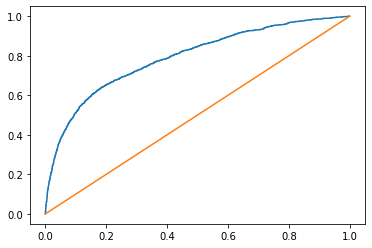

In [82]:
model_eval(RandomForestClassifier(**rbp),x,y)

overall accuracy -Train:  0.8478314038806457
confusion matrix:
 [[15577   746]
 [ 2987  5222]]
AUC-train: 0.9401239214685011
overall accuracy -Test:  0.7924671866083317
confusion matrix:
 [[6508  533]
 [1649 1824]]
AUC-Test: 0.83868289770667
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      7041
           1       0.77      0.53      0.63      3473

    accuracy                           0.79     10514
   macro avg       0.79      0.72      0.74     10514
weighted avg       0.79      0.79      0.78     10514



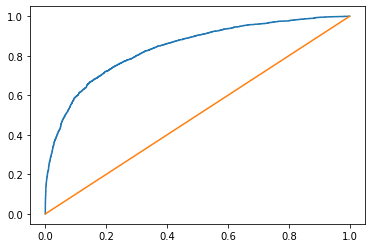

In [83]:
model_eval(RandomForestClassifier(**rbp_sm),x_sm,y_sm)

overall accuracy -Train:  0.8268095238095238
confusion matrix:
 [[15581   696]
 [ 2941  1782]]
AUC-train: 0.8498527003215335
overall accuracy -Test:  0.8293333333333334
confusion matrix:
 [[6765  322]
 [1214  699]]
AUC-Test: 0.7881805926211242
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      7087
           1       0.68      0.37      0.48      1913

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



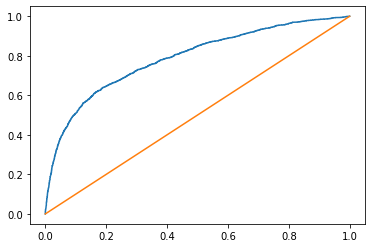

In [85]:
model_eval(LGBMClassifier(**lbp),x,y)

overall accuracy -Train:  0.9188814609489646
confusion matrix:
 [[15958   365]
 [ 1625  6584]]
AUC-train: 0.9785956069407611
overall accuracy -Test:  0.8028343161498954
confusion matrix:
 [[6445  596]
 [1477 1996]]
AUC-Test: 0.8452131366800507
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      7041
           1       0.77      0.57      0.66      3473

    accuracy                           0.80     10514
   macro avg       0.79      0.75      0.76     10514
weighted avg       0.80      0.80      0.79     10514



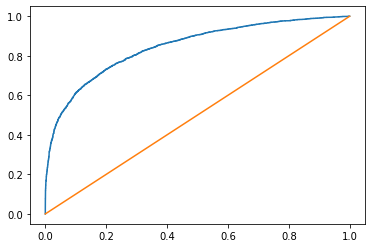

In [86]:
model_eval(LGBMClassifier(**lbp_sm),x_sm,y_sm)

# Results

### With no changes

#### Random Forest 

accuracy = 0.8282222222222222

auc score = 0.7909824139986402

#### Light GBM

accuracy = 0.8293333333333334

auc score = 0.7881805926211242

### Using SMOTE

#### Random Forest 

accuracy = 0.7924671866083317

auc score = 0.83868289770667

#### Light GBM

accuracy = 0.8028343161498954

auc score = 0.8452131366800507

## Conclusion

We can see that Smote sloves the problem created by imbalanced data to some extent. It significantly increases recal and also the auc score, thus incresesing the possibility of choosing a better threshold according to the business requirements